In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [3]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

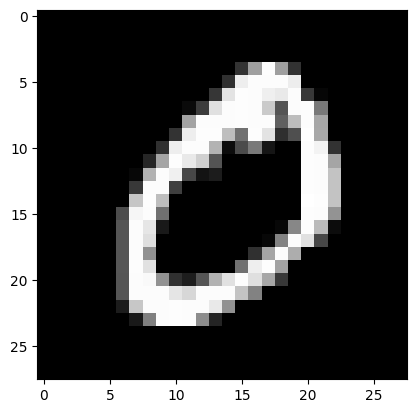

In [4]:
singel_image = pixel_values.iloc[1, : ].values.reshape(28,28)
plt.imshow(singel_image,cmap='grey')

In [5]:
tsne = manifold.TSNE(n_components=2,random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000,:])

In [9]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),
                       columns=["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

              x          y  targets
0     20.276270 -11.373996      5.0
1     57.526806  -0.077877      0.0
2     -0.635003 -54.560963      4.0
3    -41.022923  11.359246      1.0
4    -10.339593 -33.171558      9.0
...         ...        ...      ...
2995 -36.246044 -25.143169      7.0
2996  52.476883  -3.384054      0.0
2997 -30.989498 -13.174622      9.0
2998 -29.206312  45.753082      1.0
2999  10.927265 -22.952349      5.0

[3000 rows x 3 columns]


<Figure size 10000x10000 with 0 Axes>

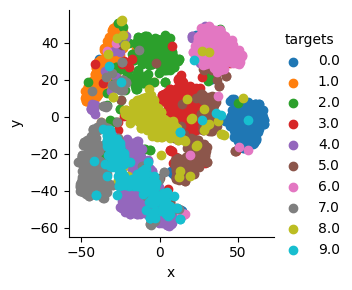

In [17]:
grid = sns.FacetGrid(tsne_df,hue='targets')
grid.map(plt.scatter,'x','y').add_legend()
